# Credit Card Fraud Detection - UNBALANCED DATA
### Anonymized credit card transactions labeled as fraudulent or genuine

#### Context

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

#### Content

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. 
##### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve

In [2]:
df = pd.read_csv('/Users/kushagragahlaut/Desktop/code/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
 df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

#### Highly unbalanced data

In [6]:
fraud = df[df['Class'] == 1]

genuine = df[df['Class'] == 0]

In [9]:
print(fraud['Class'].value_counts())
print(genuine['Class'].value_counts())

1    492
Name: Class, dtype: int64
0    284315
Name: Class, dtype: int64


In [7]:
fraud.Amount.describe()   # give details of Amount corresponding to fraud

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [8]:
genuine.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [9]:
#compare the value for both transaction
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


## UnderSampling

Build a sample dataset containing similar distribtion of Genuine transaction and Fraudulant Transaction

In [10]:
genuine_sample = genuine.sample(n=492)  #selecting equal samples from dataset

In [11]:
new_df = pd.concat([genuine_sample,fraud],axis=0)

In [12]:
new_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [13]:
new_df['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [14]:
new_df.groupby('Class').mean()   # Original properties of data is still intact

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96353.607724,0.053955,0.036759,-0.017469,0.073421,0.026756,0.193033,-0.004605,-0.015128,-0.010132,...,0.035215,-0.055078,0.023768,-0.007380,-0.025544,-0.033436,0.009177,-0.004702,0.011952,93.080752
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [15]:
X = new_df.drop('Class',axis=1)
y = new_df['Class']

In [16]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
229882,146090.0,0.643850,-1.861256,-0.826936,4.008563,-0.545356,1.220595,0.132406,0.249655,-0.556207,...,0.975363,0.583428,0.122759,-0.356663,0.305555,-0.528065,-0.095620,-0.130889,0.070011,640.87
140687,83871.0,-0.502291,0.891987,1.539535,-0.190003,0.104048,-0.114663,0.484793,0.258628,-0.552803,...,0.035614,-0.155698,-0.426042,0.008237,-0.020897,-0.319753,0.085889,0.272634,0.106009,4.99
47155,43105.0,1.322279,-1.752575,1.593384,-0.732333,-2.542395,0.250040,-1.919545,0.239144,-0.152842,...,-0.325992,-0.294262,-0.094943,-0.030671,0.405211,0.354654,-0.083300,0.100066,0.037611,52.95
210337,137936.0,2.104374,-1.110759,-0.429831,-0.788821,-0.734129,0.906322,-1.443152,0.293196,0.067891,...,-0.454700,-0.332740,-0.411514,0.274536,-0.355407,-0.567655,0.498165,0.004317,-0.043833,21.85
256604,157771.0,-0.242991,0.640743,1.001654,-0.822653,0.845590,-0.211388,0.957826,-0.250032,-0.105751,...,-0.004954,0.431839,1.619711,-0.561585,-0.304102,0.183392,-0.039676,-0.006204,-0.082861,1.00


In [17]:
y

229882    0
140687    0
47155     0
210337    0
256604    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify = y, random_state = 2)  
                                                     #stratify evenly distributes the value of y in train and test data

In [19]:
print(X_train.shape, X_test.shape)

(787, 30) (197, 30)


## Model Training - Logistic Regression

In [20]:
LR = LogisticRegression(solver = 'newton-cg', random_state=42)

In [21]:
LR.fit(X_train,y_train)

/Users/kushagragahlaut/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/kushagragahlaut/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/kushagragahlaut/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/kushagragahlaut/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/kushagragahlaut/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesear

LogisticRegression(random_state=42, solver='newton-cg')

## Model Evaluation

In [29]:
#training data prediction
y_train_pred = LR.predict(X_train)
accuracy_train = accuracy_score(y_train,y_train_pred)
print(accuracy_train)

0.9529860228716646


In [27]:
#test data prediction
y_pred = LR.predict(X_test)
print(y_pred)

[1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0
 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0
 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0
 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1
 0 1 0 0 0 1 1 0 1 1 1 0]


In [35]:
y_test.value_counts()

0    99
1    98
Name: Class, dtype: int64

In [28]:
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.9137055837563451


In [30]:
from sklearn.metrics import classification_report

Class_report = classification_report(y_test,y_pred)
print(Class_report)

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        99
           1       0.93      0.90      0.91        98

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197



AUC =  0.9674293960008244
Decent, since AUC > 0.5
0.5


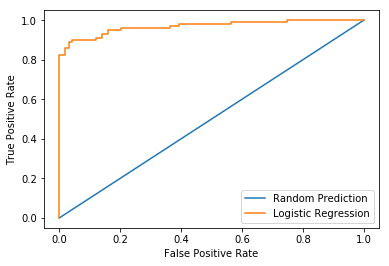

In [34]:
logistic_regression_probability = LR.predict_proba(X_test)
logistic_regression_probability = logistic_regression_probability[:,1]
logistic_regression_AUC = roc_auc_score(y_test,logistic_regression_probability)
print('AUC = ',logistic_regression_AUC)
if logistic_regression_AUC > 0.5:
    print('Decent, since AUC > 0.5')
else:
    print('AUC not good')

prob_0 = [0 for _ in range(len(y_test))]
prob_0_auc = roc_auc_score(y_test,prob_0)
print(prob_0_auc)


logistic_regression_fpr,logistic_regression_tpr,_=roc_curve(y_test,logistic_regression_probability)
prob_0_fpr,prob_0_tpr,_=roc_curve(y_test,prob_0)

plt.plot(prob_0_fpr,prob_0_tpr,label='Random Prediction')
plt.plot(logistic_regression_fpr,logistic_regression_tpr,label='Logistic Regression')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()